In [1]:
import numpy as np
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,RNN
import math
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('../Dataset/RelianceClean.csv')


In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Time,Prev Close,Prev Open,PrevOPDiff,Prev High,Prev Low,Prev Volume
0,2014-01-03,431.71,432.57,423.49,428.07,2933613,1,433.39,439.68,6.29,443.79,430.96,1376901.0
1,2014-01-06,427.00,427.57,421.01,423.46,3043781,2,428.07,431.71,3.64,432.57,423.49,2933613.0
2,2014-01-07,423.29,425.94,416.08,417.10,3957111,3,423.46,427.00,3.54,427.57,421.01,3043781.0
3,2014-01-08,418.24,424.65,418.24,420.54,2909048,4,417.10,423.29,6.19,425.94,416.08,3957111.0
4,2014-01-09,421.23,422.89,418.56,421.36,1899340,5,420.54,418.24,-2.30,424.65,418.24,2909048.0


In [4]:
df.describe()

,Open,High,Low,Close,Volume,Time,Prev Close,Prev Open,PrevOPDiff,Prev High,Prev Low,Prev Volume
count,2348.000000,2348.000000,2348.000000,2348.000000,2.348000e+03,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2.348000e+03
mean,1292.718186,1306.596699,1277.601759,1291.710477,7.215390e+06,1174.500000,1290.693842,1291.705698,1.011857,1305.577253,1276.595779,7.210892e+06
std,787.425585,795.598513,778.939800,786.723597,6.330920e+06,677.953538,786.289465,786.993082,23.634864,795.169558,778.507006,6.331315e+06
min,396.290000,0.000000,0.000000,396.220000,0.000000e+00,1.000000,396.220000,396.290000,-130.900000,0.000000,0.000000,0.000000e+00
25%,506.575000,511.342500,501.617500,506.460000,3.458450e+06,587.750000,506.117500,506.200000,-7.807500,511.062500,501.512500,3.457962e+06
50%,1099.085000,1116.565000,1087.740000,1100.145000,5.441290e+06,1174.500000,1099.700000,1098.265000,0.810000,1116.420000,1086.950000,5.440390e+06
75%,2092.000000,2113.250000,2070.800000,2087.762500,8.634693e+06,1761.250000,2087.562500,2091.550000,9.692500,2112.250000,2070.550000,8.618589e+06
max,2856.150000,2856.150000,2793.000000,2820.450000,6.523089e+07,2348.000000,2819.850000,2856.150000,166.200000,2856.150000,2786.100000,6.523089e+07


In [5]:
a =df['Date'].min()
b =df['Date'].max()
d1 = datetime.strptime(b, "%Y-%m-%d")
d2 = datetime.strptime(a, "%Y-%m-%d")

# difference between dates in timedelta
delta = d2 - d1
print(f'Difference is {delta.days} days')

Difference is -3483 days


In [6]:
df['Date'].nunique()

2348

In [7]:
df['Date'] =  pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume,Time,Prev Close,Prev Open,PrevOPDiff,Prev High,Prev Low,Prev Volume
Date,,,,,,,,,,,,
2014-01-03,431.71,432.57,423.49,428.07,2933613,1,433.39,439.68,6.29,443.79,430.96,1376901.0
2014-01-06,427.00,427.57,421.01,423.46,3043781,2,428.07,431.71,3.64,432.57,423.49,2933613.0
2014-01-07,423.29,425.94,416.08,417.10,3957111,3,423.46,427.00,3.54,427.57,421.01,3043781.0
2014-01-08,418.24,424.65,418.24,420.54,2909048,4,417.10,423.29,6.19,425.94,416.08,3957111.0
2014-01-09,421.23,422.89,418.56,421.36,1899340,5,420.54,418.24,-2.30,424.65,418.24,2909048.0


In [8]:
df = df.resample('D').ffill().reset_index()
df['Date'].nunique()

3484

In [9]:
df1 = df["Close"]
df1

0        428.07
1        428.07
2        428.07
3        423.46
4        417.10
         ...   
3479    2740.70
3480    2740.70
3481    2740.70
3482    2796.70
3483    2820.45
Name: Close, Length: 3484, dtype: float64

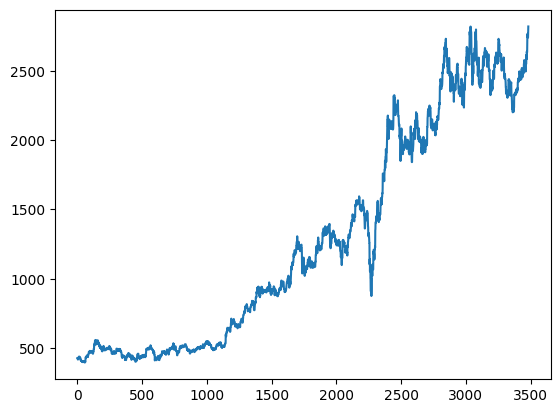

In [10]:
plt.plot(df1)

<AxesSubplot: ylabel='Frequency'>

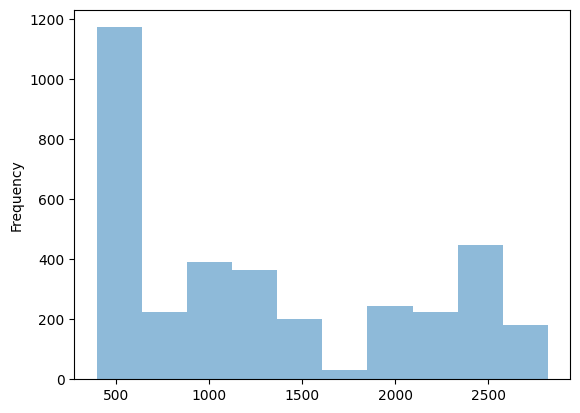

In [11]:
df1.plot.hist(alpha=0.5)

c:\Users\anish\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


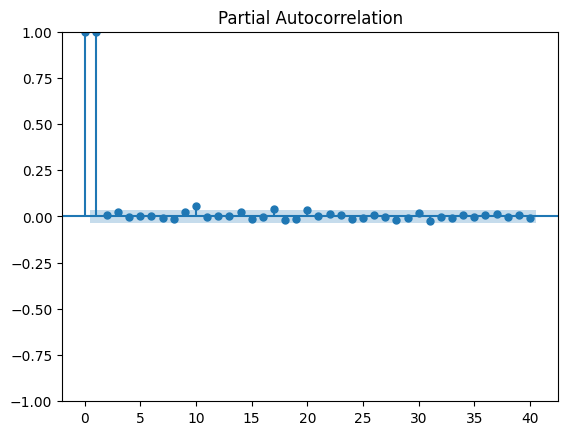

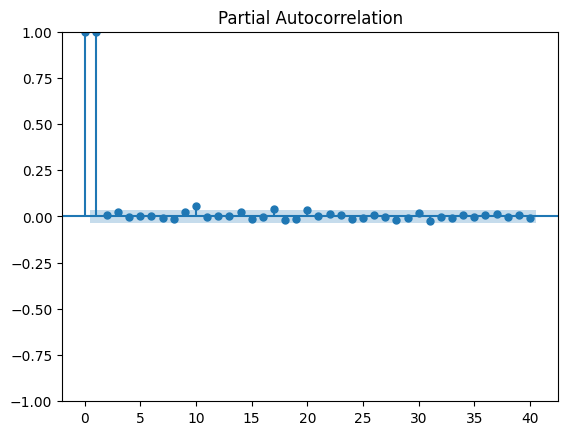

In [12]:
plot_pacf(df1, lags = 40)

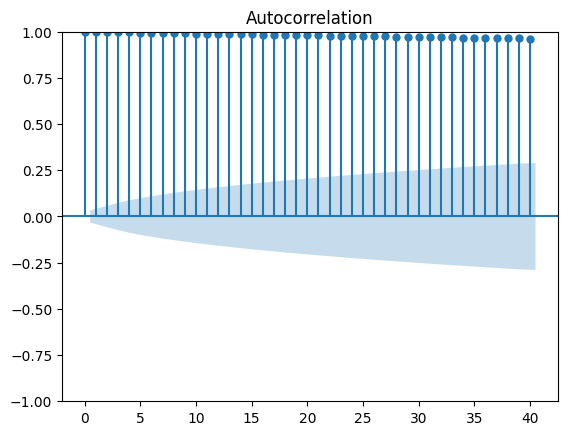

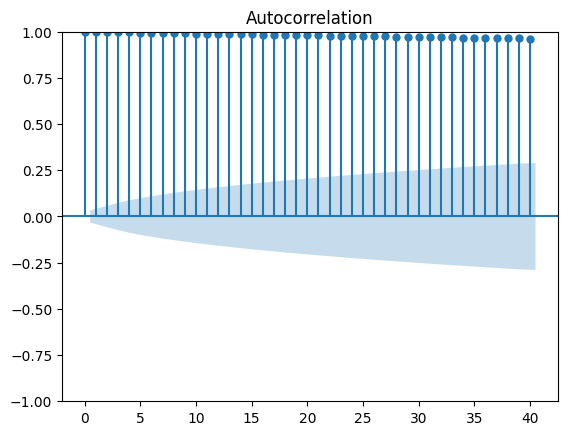

In [13]:
plot_acf(df1, lags = 40)

In [14]:

scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1.shape


(3484, 1)

In [15]:
training_size = int(len(df1)*0.7)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [17]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)

(2337, 100)
(2337,)


(None, None)

In [19]:
print(X_test.shape), print(y_test.shape)

(945, 100)
(945,)


(None, None)

In [20]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
37/37 [==============================] - 8s 127ms/step - loss: 0.0055 - val_loss: 0.0016
Epoch 2/10
37/37 [==============================] - 4s 104ms/step - loss: 4.9692e-04 - val_loss: 0.0013
Epoch 3/10
37/37 [==============================] - 4s 108ms/step - loss: 4.1023e-04 - val_loss: 0.0013
Epoch 4/10
37/37 [==============================] - 4s 106ms/step - loss: 4.0451e-04 - val_loss: 0.0021
Epoch 5/10
37/37 [==============================] - 4s 106ms/step - loss: 3.4677e-04 - val_loss: 0.0011
Epoch 6/10
37/37 [==============================] - 4s 107ms/step - loss: 3.2127e-04 - val_loss: 0.0016
Epoch 7/10
37/37 [==============================] - 4s 106ms/step - loss: 2.9992e-04 - val_loss: 0.0021
Epoch 8/10
37/37 [==============================] - 4s 107ms/step - loss: 3.1972e-04 - val_loss: 0.0017
Epoch 9/10
37/37 [==============================] - 4s 107ms/step - loss: 2.6643e-04 - val_loss: 9.7553e-04
Epoch 10/10
37/37 [==============================] - 4s 108ms/st

In [24]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

30/30 [==============================] - 1s 17ms/step


In [25]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [26]:
math.sqrt(mean_squared_error(y_train,train_predict))

970.3815506656466

In [27]:
math.sqrt(mean_squared_error(y_test,test_predict))

2423.8470758160024

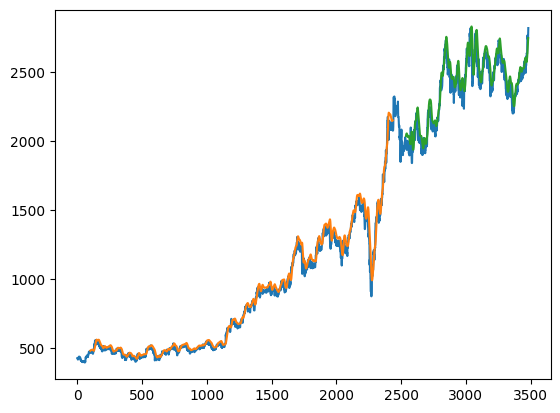

In [28]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [29]:
## Mext 30 days prediction
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 15
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))


Output of predicted next days:  15


In [30]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
[101 102 103 104 105 106 107 108 109 110 111 112 113 114 115]


In [31]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(df1[len(df1)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

# import cycle 
from itertools import cycle

# import px
import plotly.express as px

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [32]:
lstmdf=df1.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()